#  Mini-Dipper SPY
Robert Sloan <br>
5/23/2019 <br>
Replicating Al Zmyslowski's AAII CIMI Market Review - Technical & Economic Indicators<br>
Mini-Dipper (SPY)<br>
Using Yahoo Adjusted Close for SPY in calculations.<br>
This measures the 40 day simple moving average (SMA) vs the 170 day SMA on the SPY.<br>
Bullish if 40dSMA of the unadjusted price of the S&P Composite is greater than the 170dSMA<br>


## load libraries

In [18]:
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
#all matplotlib plots will be done inline in jupyter notebook
%matplotlib inline 

## using pandas-datareader to get Yahoo data
getting finacial data using panda-datareader https://github.com/pydata/pandas-datareader
<br>
First must install package at a command prompt in terminal:  > conda install -c anaconda pandas-datareader


In [19]:
from pandas_datareader import data

### handle dates and times

In [20]:
import datetime
currentDT = datetime.datetime.now()
#print(str(currentDT))
todays_date = str(currentDT.year) + "-" + str(currentDT.month) + "-"+  str(currentDT.day)
print(todays_date)

2019-5-23


### get SPY adjusted close

count    2363.000000
mean      175.772028
std        59.182765
min        85.641502
25%       118.484879
50%       178.700760
75%       217.317558
max       294.029999
Name: Adj Close, dtype: float64

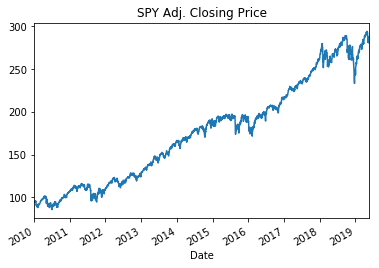

In [21]:
# Get the SPY adjusted close.
start_date = '2010-01-04'
end_date = todays_date

spy_data = data.DataReader("SPY", 
                       start=start_date, 
                       end=end_date, 
                       data_source='yahoo')['Adj Close']


spy_data.plot(title='SPY Adj. Closing Price')# Convert the adjusted closing prices to cumulative returns.
spy_data.head()
spy_data.describe()

#### Calculate 40 and 170 day simple moving averages

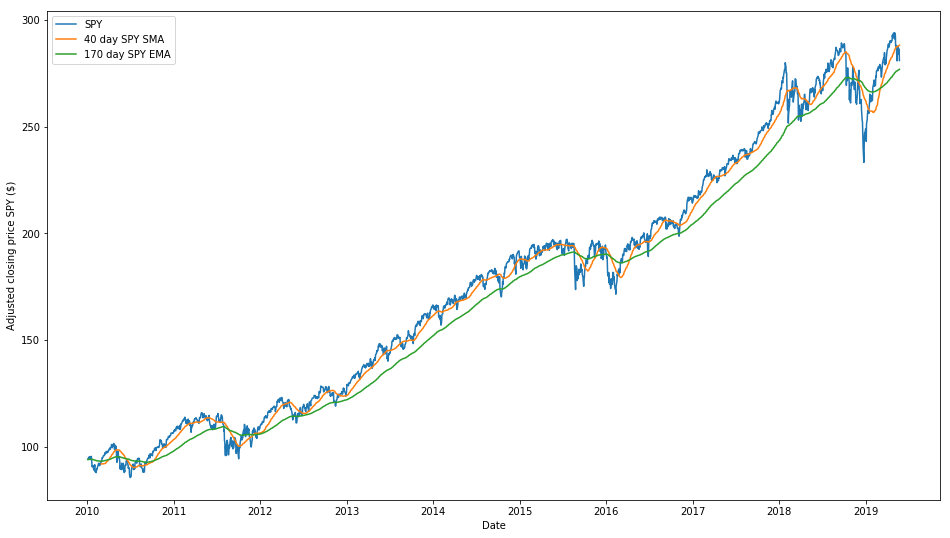

In [22]:
# Get the spy_data timeseries. This now returns a Pandas Series object indexed by date.

# Calculate the 40 day and 170 day simple moving averages of the closing prices of the SPY
spy_40d_sma = spy_data.rolling(window=40).mean()

# Calculate the 170 day exponential moving average of the closing prices of the SPY
spy_170d_ema = spy_data.ewm(span=170, adjust=False).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(spy_data.index, spy_data, label='SPY')
ax.plot(spy_40d_sma.index, spy_40d_sma, label='40 day SPY SMA')
ax.plot(spy_170d_ema.index, spy_170d_ema, label='170 day SPY EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price SPY ($)')
ax.legend()

### Determine going 'Long' or 'Short' when moving averages cross

In [23]:
# Current Day 40 day and 170 day SPY SMA
current_spy = spy_data.loc[todays_date]
print("today's SPY " + str(current_spy))
current_spy_40d_sma = spy_40d_sma.loc[todays_date]
print("40 day " + str(current_spy_40d_sma))
current_spy_170d_ema = spy_170d_ema.loc[todays_date]
print("170 day " + str(current_spy_170d_ema))
# Determin if 40 day SPY SMA is greater than 170 day SMA and how much
mini_dipper_spy = current_spy_40d_sma - current_spy_170d_ema
print("40 day SMA - 170 day EMA " + str(mini_dipper_spy))
mini_dipper_spy_percent = round(mini_dipper_spy/current_spy,1)
print(mini_dipper_spy_percent)
if (mini_dipper_spy>1):
    status_mini_dipper = 'LONG'
else:
    status_mini_dipper = 'SHORT'
print(status_mini_dipper)
    

today's SPY 281.0199890136719
40 day 288.2069999694824
170 day 276.91021452264874
40 day SMA - 170 day EMA 11.296785446833667
0.0
LONG


### Create DataFrame with result

In [24]:
indicators = pd.DataFrame([{'Technical Indicator': 'Mini-Dipper SPY', 'Type': 'Market Timer', 'Status': status_mini_dipper,
                          'Value': str(mini_dipper_spy_percent), 'Comment': "40d SMA/200d EMA"}], 
                           columns=['Technical Indicator', 'Type', 'Status', 'Value', 'Comment'])
indicators

,Technical Indicator,Type,Status,Value,Comment
0,Mini-Dipper SPY,Market Timer,LONG,0.0,40d SMA/200d EMA


### Output to Excel file

In [25]:
writer = pd.ExcelWriter('indicator_sheet Mini-Dipper SPY.xlsx')
indicators.to_excel(writer,'Indicators', index=False)
writer.save()